# Lecture 5
- Pipeline



In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,mutual_info_classif , f_classif



In [2]:
def PrintMySearch_Clf(Mysearch):
    print("Best Param: ", Mysearch.best_params_)
    print("Best Estimator", Mysearch.best_estimator_)
    Sresults=Mysearch.cv_results_
    
    plt.figure(figsize=(8,4))
    plt.plot(Sresults['mean_test_score'])
    plt.ylabel("score")
    plt.title('GridSearchCV Score results')
    plt.grid(axis = 'y',linestyle='--')
    plt.show()
    
    for mean_score, params in zip(Sresults['mean_test_score'],Sresults['params']):
        print(' %.6f'%mean_score,params)

In [7]:
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=4720,class_sep=0.4)



print('X shape is: ',X.shape,'\t y shape is: ',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4720)

print('X_train shape is: ',X_train.shape,'\t y_train shape is: ',y_train.shape)
print('X_test shape is: ',X_test.shape,'\t y_test shape is: ',y_test.shape)



X shape is:  (1000, 100) 	 y shape is:  (1000,)
X_train shape is:  (800, 100) 	 y_train shape is:  (800,)
X_test shape is:  (200, 100) 	 y_test shape is:  (200,)


X_FS shape:  (800, 20)
Accuracy score is: 0.64500


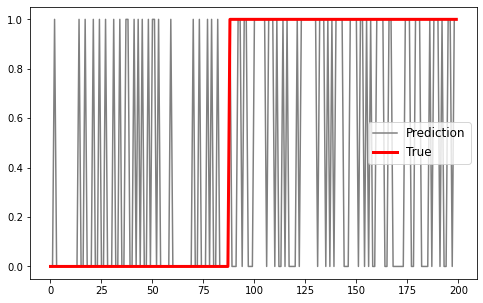

In [4]:
# Without Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4720)


#========================================== Training ============================== 
#1-scaling
scaler=StandardScaler()

X_train_sc=scaler.fit_transform(X_train)

#2-feature selection
FS=SelectKBest(f_classif,k=20)   

X_train_fs=FS.fit_transform(X_train_sc,y_train)

print('X_FS shape: ',X_train_fs.shape)

#3-classifier
clf=SVC(C=2,kernel='linear',gamma=0.05)

clf.fit(X_train_fs,y_train)

#========================================== Testing ============================== 

X_test_sc=scaler.transform(X_test)       #1-scaling
X_test_fs=FS.transform(X_test_sc)        #2-feature selection
y_predict=clf.predict(X_test_fs)      #3-classifier prediction



# report the results
print('Accuracy score is: %.5f'%accuracy_score(y_test,y_predict))

sort_ind=np.argsort(y_test)
plt.figure(figsize=(8,5))
plt.plot(y_predict[sort_ind],linewidth=1.5,c='gray')
plt.plot(y_test[sort_ind],linewidth=3,c='red')
plt.legend(['Prediction','True'],loc='best',fontsize=12)
plt.show()

X_FS shape:  (800, 20)
Best Param:  {'C': 2, 'gamma': 0.05, 'kernel': 'rbf'}
Best Estimator SVC(C=2, gamma=0.05)


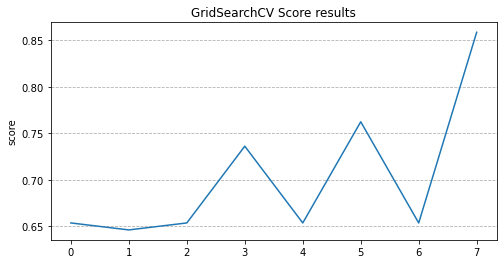

 0.653750 {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
 0.646250 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
 0.653750 {'C': 0.1, 'gamma': 0.05, 'kernel': 'linear'}
 0.736250 {'C': 0.1, 'gamma': 0.05, 'kernel': 'rbf'}
 0.653750 {'C': 2, 'gamma': 0.01, 'kernel': 'linear'}
 0.762500 {'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}
 0.653750 {'C': 2, 'gamma': 0.05, 'kernel': 'linear'}
 0.858750 {'C': 2, 'gamma': 0.05, 'kernel': 'rbf'}
Accuracy score is: 0.83000


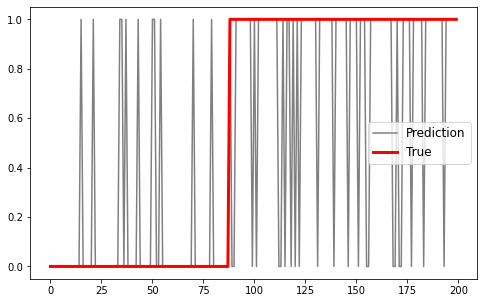

In [5]:
#Hyper-parameter optimization


#Best hyper-paramers?

####### Repeat
#========================================== Training ==============================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4720)

scaler=StandardScaler()

X_train_sc=scaler.fit_transform(X_train)

FS=SelectKBest(f_classif,k=20) #f_class_if is better than mutul_info,chi2 

X_train_fs=FS.fit_transform(X_train_sc,y_train)

print('X_FS shape: ',X_train_fs.shape)

clf=SVC(C=2,kernel='linear',gamma=0.05)

### ====== Hyper-parameter optimization ================================================

space={'C':[0.1,2],'kernel':['linear','rbf'],'gamma':[0.01,0.05]}


search=GridSearchCV(estimator=clf,param_grid=space,cv=5, scoring='accuracy' )


search.fit(X_train_fs,y_train)



# report the results

print("Best Param: ", search.best_params_)
print("Best Estimator", search.best_estimator_)
results=search.cv_results_
    
plt.figure(figsize=(8,4))
plt.plot(results['mean_test_score'])
plt.ylabel("score")
plt.title('GridSearchCV Score results')
plt.grid(axis = 'y',linestyle='--')
plt.show()
    
for mean_score, params in zip(results['mean_test_score'],results['params']):
    print(' %.6f'%mean_score,params)


#========================================== Testing ==============================

X_test_sc=scaler.transform(X_test)       #1-scaling
X_test_fs=FS.transform(X_test_sc)        #2-feature selection   

bestmodel=search.best_estimator_

y_predict=bestmodel.predict(X_test_fs)      #3-classifier prediction



# report result
print('Accuracy score is: %.5f'%accuracy_score(y_test,y_predict))
sort_ind=np.argsort(y_test)
plt.figure(figsize=(8,5))
plt.plot(y_predict[sort_ind],linewidth=1.5,c='gray')
plt.plot(y_test[sort_ind],linewidth=3,c='red')
plt.legend(['Prediction','True'],loc='best',fontsize=12)
plt.show()


#####
# Question!

# What if I want to search for parameters of feature selection?
# what if I want to seach for parameters of feature selectino and hyper-parameters of the ML model at the same time? 




Best Param:  {'SVC__C': 2, 'SVC__gamma': 0.05, 'SVC__kernel': 'rbf', 'selectK__k': 40, 'selectK__score_func': <function f_classif at 0x000002054DD4B790>}
Best Estimator Pipeline(steps=[('scale', StandardScaler()), ('selectK', SelectKBest(k=40)),
                ('SVC', SVC(C=2, gamma=0.05))])


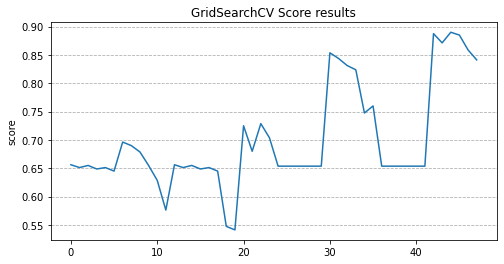

 0.656250 {'SVC__C': 0.1, 'SVC__gamma': 0.01, 'SVC__kernel': 'linear', 'selectK__k': 60, 'selectK__score_func': <function f_classif at 0x000002054DD4B790>}
 0.651250 {'SVC__C': 0.1, 'SVC__gamma': 0.01, 'SVC__kernel': 'linear', 'selectK__k': 60, 'selectK__score_func': <function mutual_info_classif at 0x000002054DE4A790>}
 0.655000 {'SVC__C': 0.1, 'SVC__gamma': 0.01, 'SVC__kernel': 'linear', 'selectK__k': 40, 'selectK__score_func': <function f_classif at 0x000002054DD4B790>}
 0.648750 {'SVC__C': 0.1, 'SVC__gamma': 0.01, 'SVC__kernel': 'linear', 'selectK__k': 40, 'selectK__score_func': <function mutual_info_classif at 0x000002054DE4A790>}
 0.651250 {'SVC__C': 0.1, 'SVC__gamma': 0.01, 'SVC__kernel': 'linear', 'selectK__k': 20, 'selectK__score_func': <function f_classif at 0x000002054DD4B790>}
 0.645000 {'SVC__C': 0.1, 'SVC__gamma': 0.01, 'SVC__kernel': 'linear', 'selectK__k': 20, 'selectK__score_func': <function mutual_info_classif at 0x000002054DE4A790>}
 0.696250 {'SVC__C': 0.1, 'SVC__ga

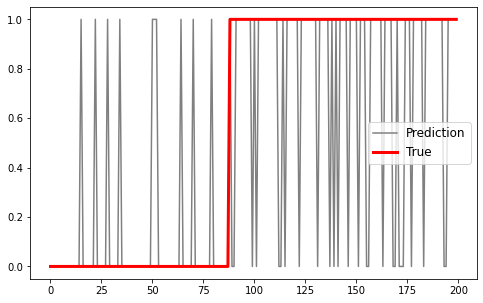

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4720)


pipe=Pipeline([ 
    ('scale',StandardScaler())
    ,('selectK', SelectKBest(score_func=f_classif, k=20))          #select k best features
    ,('SVC', SVC(C=2,kernel='rbf',gamma=0.05))          #SVM classifier
])


HP_space={
         'selectK__score_func':[f_classif,mutual_info_classif],
         'selectK__k':[60,40,20],
         'SVC__C':[0.1,2],
         'SVC__kernel':['linear','rbf'],
         'SVC__gamma':[0.01,0.05]
         }

search = GridSearchCV(pipe, HP_space, cv=5,scoring='accuracy')


## ============================== Training ===============================
search.fit(X_train,y_train)


PrintMySearch_Clf(search)

## ============================== Testing ===============================

bestmodel=search.best_estimator_

y_predict=bestmodel.predict(X_test)



print('Accuracy score is: %.5f'%accuracy_score(y_test,y_predict))

sort_ind=np.argsort(y_test)
plt.figure(figsize=(8,5))
plt.plot(y_predict[sort_ind],linewidth=1.5,c='gray')
plt.plot(y_test[sort_ind],linewidth=3,c='red')
plt.legend(['Prediction','True'],loc='best',fontsize=12)
plt.show()